Dans ce notebook, nous avons pris le temps de convertir du code qiskit de ce répo github du papier de recherche : https://github.com/QuantumRadioAstronomy/MA2-project_QuantumRadioImage en code pennylane. Nous avons changer la structure de l'encodage et du décodage du code original pour qu'il fit plus avec la façon que pennylane fonctionne. deplus, on a intégrer directement dans le notebook la partie machine learning du papier.

In [2]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2
from skimage import io
from skimage.transform import resize
import h5py
from skimage import color

In [3]:
def qpie_encoding(image_data):
    n = int(np.log2(image_data.size))

    amplitudes = image_data.flatten()
    amplitudes = amplitudes/np.linalg.norm(amplitudes) #normalize coefficients
    return amplitudes, n

10


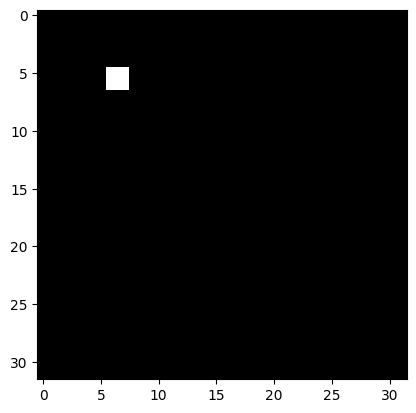

In [85]:
img = np.zeros((32,32))
img[5,6] = 1
img[6,6] = 1
img[5,7] = 1
img[6,7] = 1
plt.imshow(img,cmap='gray')

amp, n = qpie_encoding(img)
print(n)
SHOTS = 1048576
dev1 = qml.device('default.qubit', wires=n, shots=SHOTS)

In [4]:

def circuit(init_value, num_wire, device):
    def inside_circuit():
        qml.QubitStateVector(init_value, wires=range(num_wire))
        return qml.probs()
    return qml.QNode(inside_circuit, device)

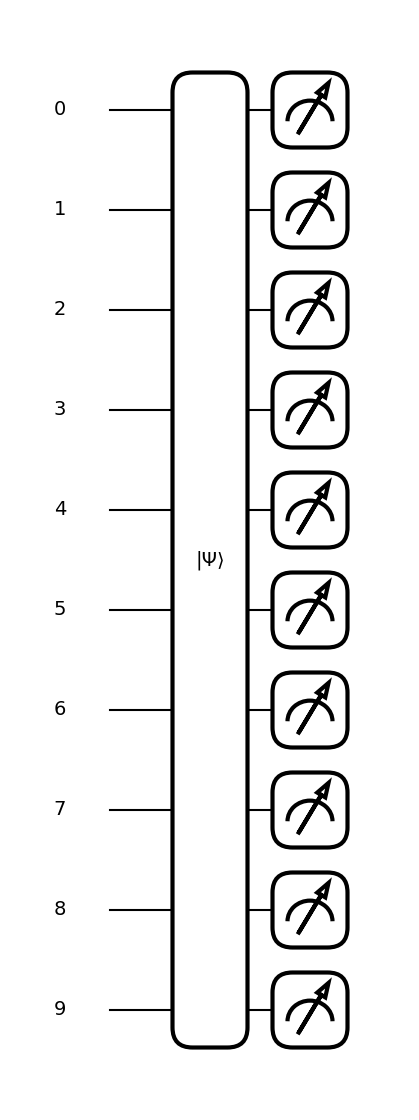

In [6]:
fig, ax = qml.draw_mpl(circuit(amp,n,dev1))()

In [7]:
measured_circuit = circuit(amp,n,dev1)()

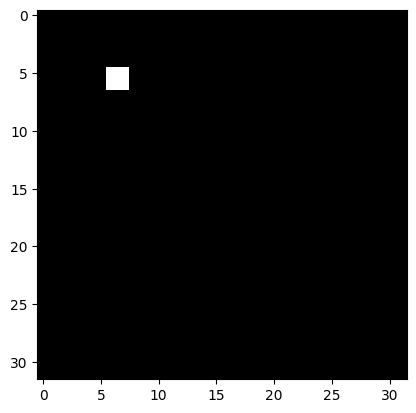

In [8]:
norm = (np.linalg.norm(img.flatten()))
imout = measured_circuit.reshape(img.shape)
plt.imshow(imout,cmap='gray')

In [12]:
def MSE(img1,img2):

    img = (img1-img2)**2
    s = np.sum(img.flatten())/(len(img1**2))

    return s

In [10]:
MSE(img,imout)

0.07031250826986479

10
muh wires : [0, 1, 2, 3, 4]
meh wires : [5, 6, 7, 8, 9]
[85.36594139 85.16844306 83.30609529 ... 80.82200903 83.33800722
 83.8575164 ]


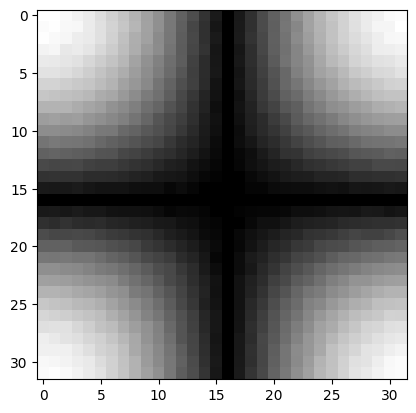

In [86]:
def qft_circuit(init_value,num_wire,device):
    @qml.qnode(device)
    def inside_circuit():
        qml.QubitStateVector(init_value, wires=range(num_wire))
        print(num_wire)
        print(f"muh wires : {[i for i in range(int(num_wire/2))]}")
        print(f"meh wires : {[i+int(num_wire/2) for i in range(int(num_wire/2))]}")
        qml.QFT(wires=[i for i in range(int(num_wire/2))])
        qml.QFT(wires=[i+int(num_wire/2) for i in range(int(num_wire/2))])
        return qml.probs()
    return qml.QNode(inside_circuit, device)

measured_qft_circuit = np.sqrt(qft_circuit(amp,n,dev1)()) * norm * 2**(n/2)
print(measured_qft_circuit)
imout = measured_qft_circuit.reshape(img.shape)
plt.imshow(imout,cmap='gray')

10
muh wires : [0, 1, 2, 3, 4]
meh wires : [5, 6, 7, 8, 9]


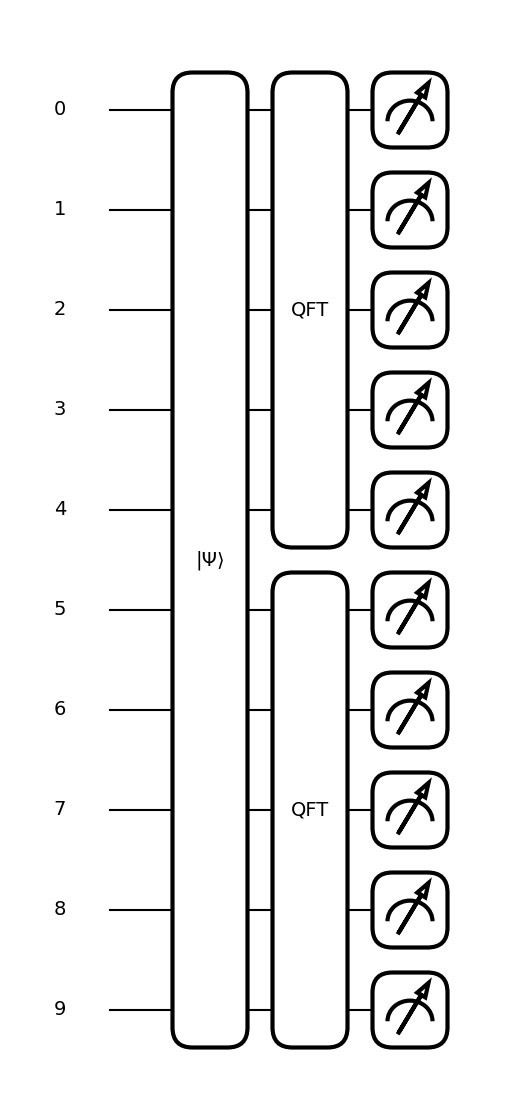

In [12]:
fig, ax = qml.draw_mpl(qft_circuit(amp,n,dev1))()

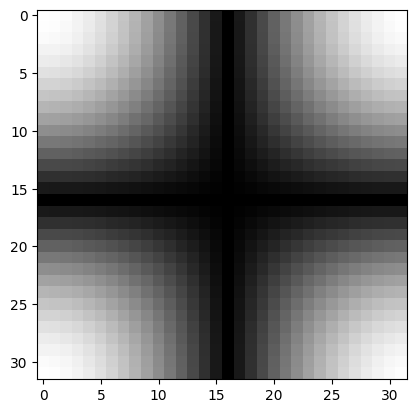

In [13]:
ft = fft2(img)
plt.imshow(np.abs(ft),cmap='gray')

In [14]:
MSE(imout,np.abs(ft))

0.029935415980556802

10
muh wires : [0, 1, 2, 3, 4]
meh wires : [5, 6, 7, 8, 9]


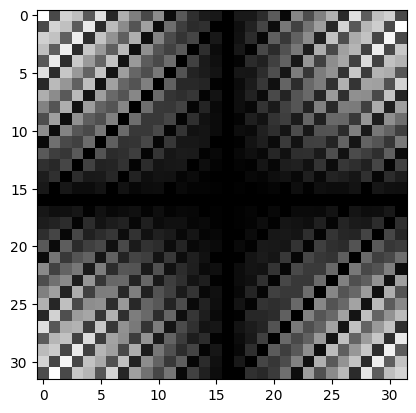

In [15]:
img = np.zeros((32,32))
img[5,6] = 1
img[6,6] = 1
img[5,7] = 1
img[6,7] = 1
img[24,25] = 1
img[25,25] = 1
img[24,26] = 1
img[25,26] = 1
amp, n = qpie_encoding(img)
norm = (np.linalg.norm(img.flatten()))
measured_qft_circuit = np.sqrt(qft_circuit(amp,n,dev1)()) * norm * 2**(n/2)
imout = measured_qft_circuit.reshape(img.shape)
plt.imshow(imout,cmap='gray')

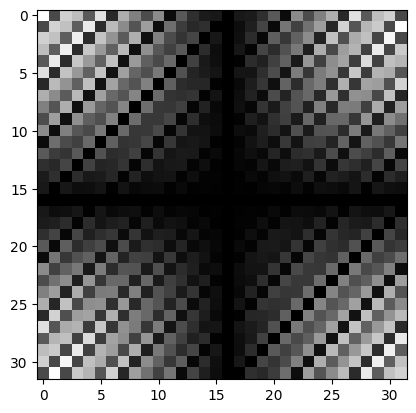

In [16]:
ft = fft2(img)
plt.imshow(np.abs(ft),cmap='gray')

In [17]:
MSE(imout,np.abs(ft))

0.05658447500388093

10
muh wires : [0, 1, 2, 3, 4]
meh wires : [5, 6, 7, 8, 9]


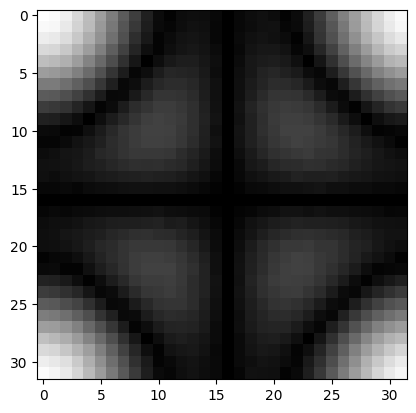

In [18]:
img = np.zeros((32,32))
img[4,4]=1
img[4,5]=1
img[5,4]=1
img[5,5]=1
img[6,4]=1
img[6,5]=1
img[7,4]=1
img[7,5]=1
img[5,3]=1
img[6,3]=1
img[5,5]=1
img[6,6]=1
img[5,6]=1
amp, n = qpie_encoding(img)
norm = (np.linalg.norm(img.flatten()))
measured_qft_circuit = np.sqrt(qft_circuit(amp,n,dev1)()) * norm * 2**(n/2)
imout = measured_qft_circuit.reshape(img.shape)
plt.imshow(imout,cmap='gray')

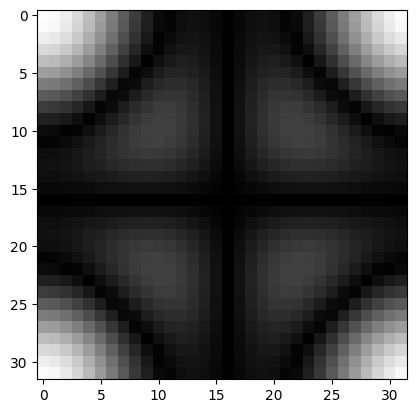

In [19]:
ft = fft2(img)
plt.imshow(np.abs(ft),cmap='gray')

In [20]:
MSE(imout,np.abs(ft))

0.09078993211547864

12
12
muh wires : [0, 1, 2, 3, 4, 5]
meh wires : [6, 7, 8, 9, 10, 11]


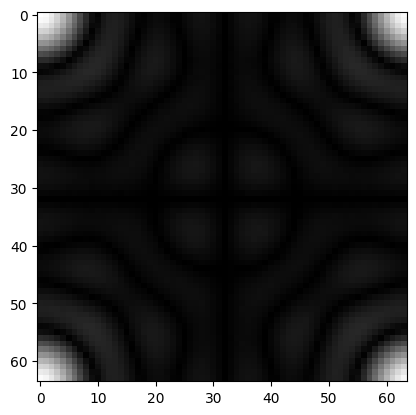

In [29]:
img = np.zeros((64,64))
img[10:14,10:18] =1
img[9,11:17]=1
img[8,12:16]=1
img[14,11:17]=1
img[15,12:16]=1
norm = (np.linalg.norm(img.flatten()))

amp, n = qpie_encoding(img)

print(n)

dev2 = qml.device('default.qubit', wires=n, shots=SHOTS)
measured_qft_circuit = np.sqrt(qft_circuit(amp,n,dev2)()) * norm * 2**(n/2)
imout = measured_qft_circuit.reshape(img.shape)
plt.imshow(imout,cmap='gray')

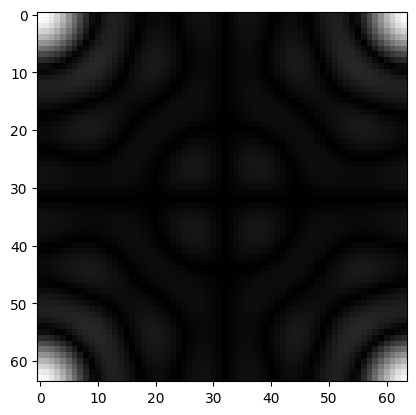

In [30]:
ft = fft2(img)
plt.imshow(np.abs(ft),cmap='gray')

In [31]:
MSE(imout,np.abs(ft))

0.32448207696592374

In [24]:
# reconstruction du code de qiskit du papier 1 pour 1 en pennylane.
def circuit_counts(init_value, num_wire, device):
    def inside_circuit():
        qml.QubitStateVector(init_value, wires=range(num_wire))
        return qml.counts()
    return qml.QNode(inside_circuit, device)

def decode_out(counts,norm,wires,fourier=False):
    outim = np.zeros((int(2**(n/2)), int(2**(n/2))))

    b = 0
    for i,j in np.ndindex(outim.shape):

        bit = format(b, '0' + str(n) + 'b')
        p_i = counts.get(bit,0)/SHOTS
        
        if fourier:
            pix_val = np.sqrt(p_i) * norm * 2**(n/2)
        else:
            pix_val = np.sqrt(p_i) * norm
            
        outim[i,j] = (pix_val)
        b+=1
    
    return outim

norm : 113.68997207360074
amps : [0.00472561 0.00472561 0.00472561 ... 0.00220759 0.00251803 0.00255252]


0.0808647788179507

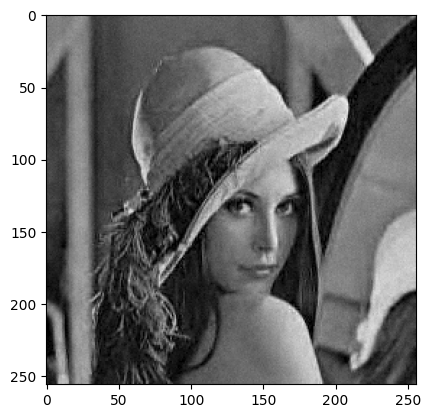

In [33]:
raw_img = io.imread('lena.jpg', as_gray=True)
im = resize(raw_img,(256,256))
norm = (np.linalg.norm(im.flatten()))
print(f"norm : {norm}")

amp, n = qpie_encoding(im)
print(f"amps : {amp}")
dev3 = qml.device('default.qubit', wires=n, shots=SHOTS)
measured_circuit = np.sqrt(circuit(amp,n,dev3)()) * norm
imout = measured_circuit.reshape(im.shape) # prend 0.8 secondes
# measured_circuit = circuit_counts(amp,n,dev3)() 
# imout = decode_out(measured_circuit, norm, n) # prend 21.3 secondes, même erreur que 0.8 secs

plt.figure()
plt.imshow(imout,cmap='gray')
MSE(imout,im)

afin d'avoir une image moin bruité, on va donner 10 fois plus de shots à notre circuit pennylane. la reconstruction d'image de QPIE est probabilistic d'où la raison pourquoi il y a du bruit

0.08182304173573413

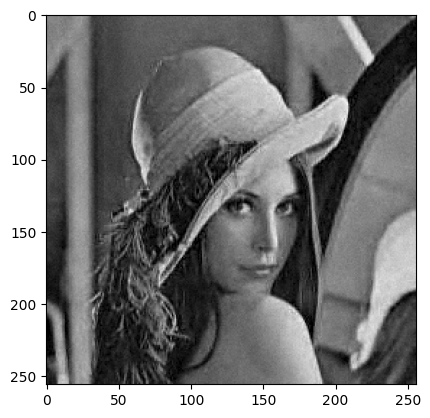

In [35]:

amp, n = qpie_encoding(im)
SHOTS = 1048576*10 # 2**10 * 10
dev3 = qml.device('default.qubit', wires=n, shots=SHOTS)
norm = (np.linalg.norm(im.flatten()))
measured_circuit = np.sqrt(circuit(amp,n,dev3)()) * norm
imout = measured_circuit.reshape(im.shape) # 5.2 secs, MSE : 0.08033409823503883
# measured_circuit = circuit_counts(amp,n,dev3)()
# imout = decode_out(measured_circuit, norm, n) # 3 minutes 6 secs, MSE : 0.0818171451810771
plt.figure()
plt.imshow(imout,cmap='gray')
SHOTS = 1048576

MSE(imout,im)

Appliquons maintenant la transformer de fourier quantique sur l'image :

16
muh wires : [0, 1, 2, 3, 4, 5, 6, 7]
meh wires : [8, 9, 10, 11, 12, 13, 14, 15]


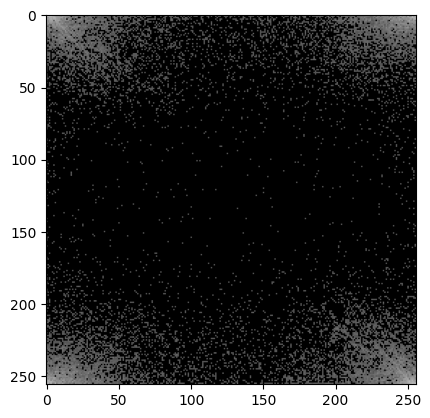

In [36]:
SHOTS = 1048576
dev4 = qml.device('default.qubit', wires=n, shots=SHOTS)
norm = (np.linalg.norm(im.flatten()))
measured_qft_circuit = np.sqrt(qft_circuit(amp,n,dev4)()) * norm * 2**(n/2)
imout = measured_qft_circuit.reshape(im.shape)
plt.figure()
plt.imshow(np.log(imout+1),cmap='gray')

Comparons les résultats d'une transformer de fourier classique sur une image vs transformer de fourier quantique sur une image avec QPIE : 

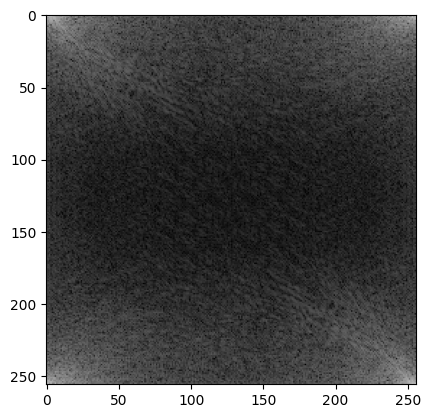

In [37]:
ft = fft2(im)
plt.figure()
plt.imshow(np.log(np.abs(ft)+1),cmap='gray')

In [38]:
MSE(np.log(imout+1),np.log(np.abs(ft)+1)) # l'erreur est moin grande que dans le papier ! meilleur performance !

815.6545988297304

Dans le papier original, cet étape a un MSE de plus de 800 en utilisant le simulateur AER d'IBM, nous avons un MSE comparable de plus de 800 avec le simulateur de pennylane. Plus le chiffre est bas, plus que l'erreur est bas. Donc on préfère avoir un nombre plus petit.
Essayons maintenant avec 100 fois le nombre de shots

16
muh wires : [0, 1, 2, 3, 4, 5, 6, 7]
meh wires : [8, 9, 10, 11, 12, 13, 14, 15]


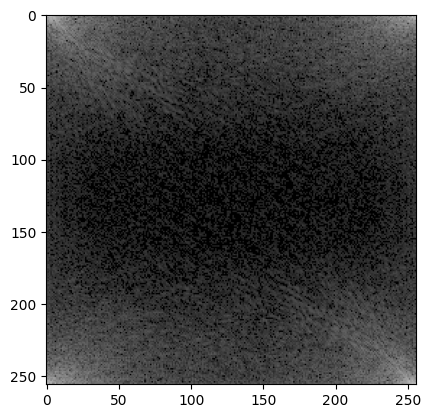

In [ ]:
SHOTS = 1048576 * 100
dev4 = qml.device('default.qubit', wires=n, shots=SHOTS)
norm = (np.linalg.norm(im.flatten()))
measured_qft_circuit = np.sqrt(qft_circuit(amp,n,dev4)()) * norm * 2**(n/2)
imout = measured_qft_circuit.reshape(im.shape) # takes 12minutes 40 secs to execute
SHOTS = 1048576
plt.figure()
plt.imshow(np.log(imout+1),cmap='gray')

In [ ]:
MSE(np.log(imout+1),np.log(np.abs(ft)+1))

66.397834200756

Comme attendu, l'erreur on signiticativement diminuer avec plus de shots

16
muh wires : [0, 1, 2, 3, 4, 5, 6, 7]
meh wires : [8, 9, 10, 11, 12, 13, 14, 15]
16
muh wires : [0, 1, 2, 3, 4, 5, 6, 7]
meh wires : [8, 9, 10, 11, 12, 13, 14, 15]
16
muh wires : [0, 1, 2, 3, 4, 5, 6, 7]
meh wires : [8, 9, 10, 11, 12, 13, 14, 15]
16
muh wires : [0, 1, 2, 3, 4, 5, 6, 7]
meh wires : [8, 9, 10, 11, 12, 13, 14, 15]


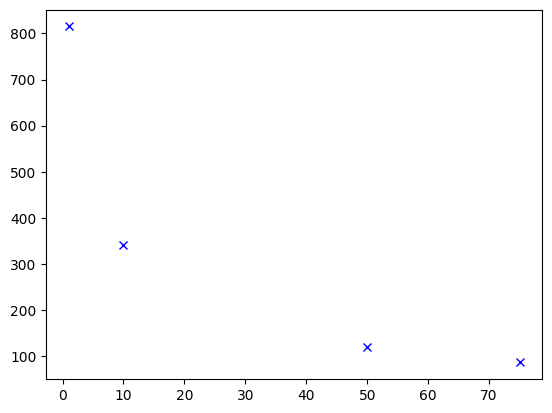

In [39]:
shots = [1,10,50,75] # takes 4 minutes to run.
MSEs = []
norm = (np.linalg.norm(im.flatten()))
for s in shots:
    SHOTS = 1048576 * s
    dev5 = qml.device('default.qubit', wires=n, shots=SHOTS)
    measured_qft_circuit = np.sqrt(qft_circuit(amp,n,dev5)()) * norm * 2**(n/2)
    imout = measured_qft_circuit.reshape(im.shape)
    MSEs.append(MSE(np.log(imout+1),np.log(np.abs(ft)+1)))
SHOTS = 1048576
plt.plot(shots,MSEs,'bx')
plt.show()

In [40]:
MSE(np.log(imout+1),np.log(np.abs(ft)+1)) #for 75 shots

85.99630948240603

In [8]:
# pour que ça fonctionne, il faut d'abord installer le dataset ici : https://www.astro.utoronto.ca/~hleung/shared/Galaxy10/Galaxy10_DECals.h5
with h5py.File('Galaxy10_DECals.h5', 'r') as F:
    images = np.array(F['images'][0:10])#take 10 galaxy images in the dataset

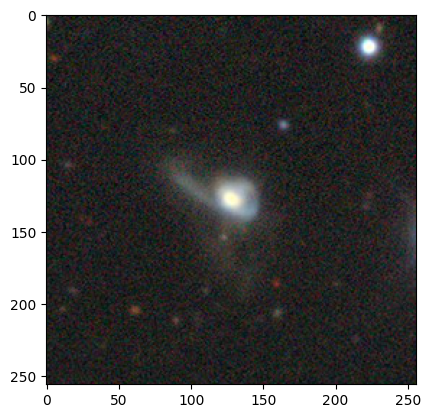

In [49]:
plt.imshow(images[2])

In [9]:
img = []#convert to grayscale
norms = []
for i in range(10):
    img.append(color.rgb2gray(images[i]))
    norms.append((np.linalg.norm(img[i].flatten())))

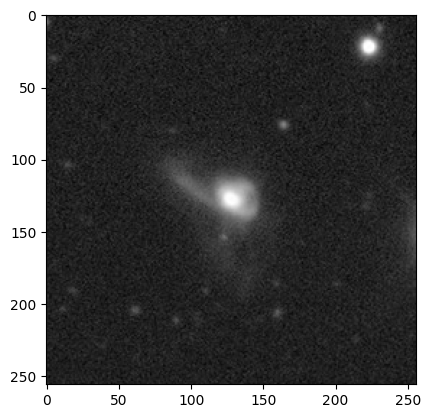

In [10]:
plt.imshow(img[2],cmap='gray')

0.12016885653019607

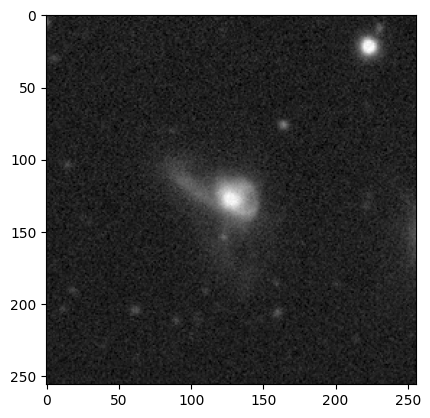

In [13]:
#encode/decode first
im = img[2]
norm = norms[2]
amp, n = qpie_encoding(im)
SHOTS = 2**20
dev6 = qml.device('default.qubit', wires=n, shots=SHOTS)
measured_circuit = np.sqrt(circuit(amp,n,dev6)()) * norm
imout = measured_circuit.reshape(im.shape)

plt.figure()
plt.imshow(imout,cmap='gray')

MSE(imout,im) #works well, MSE is small

16
muh wires : [0, 1, 2, 3, 4, 5, 6, 7]
meh wires : [8, 9, 10, 11, 12, 13, 14, 15]


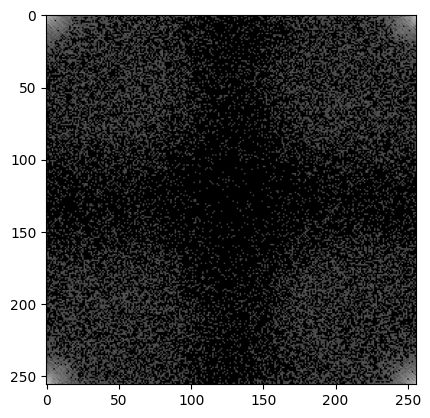

In [14]:
im = img[2]
norm = norms[2]
amp, n = qpie_encoding(im)
SHOTS = 2**20
dev7 = qml.device('default.qubit', wires=n, shots=SHOTS)
measured_qft_circuit = np.sqrt(qft_circuit(amp,n,dev7)()) * norm * 2**(n/2)
imout = measured_qft_circuit.reshape(im.shape)

plt.figure()
plt.imshow(np.log(imout+1),cmap='gray')

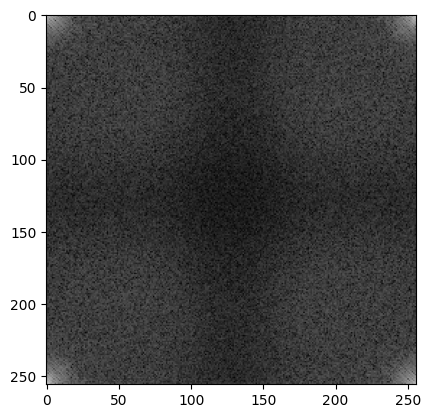

In [15]:
ft = fft2(im)
plt.figure()
plt.imshow(np.log(np.abs(ft)+1),cmap='gray')

In [16]:
MSE(np.log(imout+1),np.log(np.abs(ft)+1))

522.4085852724601

16
muh wires : [0, 1, 2, 3, 4, 5, 6, 7]
meh wires : [8, 9, 10, 11, 12, 13, 14, 15]


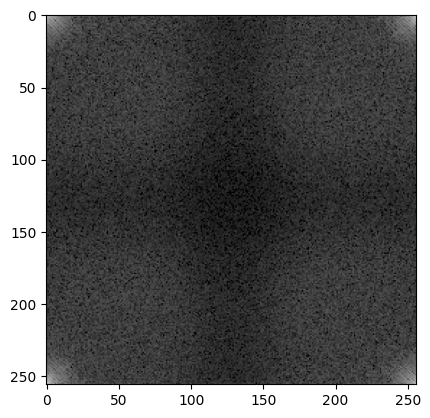

In [17]:
im = img[2]
norm = norms[2]
amp, n = qpie_encoding(im)
SHOTS = 2**20 * 100
dev7 = qml.device('default.qubit', wires=n, shots=SHOTS)
measured_qft_circuit = np.sqrt(qft_circuit(amp,n,dev7)()) * norm * 2 ** (n/2)
imout = measured_qft_circuit.reshape(im.shape) # prend 11 minutes
SHOTS = 2**20

plt.figure()
plt.imshow(np.log(imout+1),cmap='gray')

In [18]:
MSE(np.log(imout+1),np.log(np.abs(ft)+1))

6.177927166645903

Jusqu'à maintenant, on a tester comment encoder et appliquer des images à l'aide de "Quantum Probability Image Encoding" QPIE. Simulon maintenant un cas où nous vourions calibrer le gain d'une antenne.

In [81]:
# on initialise les variables 
inits = []
opti_class = []
opti_gd = []
good_g = []

diff_class = []
diff_gd = []
diff_full = []

cost_init = []
cost_gd = []
cost_clas = []
cost_g = []
cost_fullclass = []

it_clas=[]

his_fullclas  = []
his_clas = []
his_q = []

Tout d'abord, nous avons convertie la class qui permet de reproduire la section 6 du papier. Dans le papier original, ils ont utiliser l'optimisateur COBYLA de scipy, mais nous allons plutôt utiliser des optimiseurs de pennylanes. 

In [74]:
def swap_test(state1, state2, state1_nb_qubits, state2_nb_qubits, device): #Function to perform swap test between 2 given states
    @qml.qnode(device)
    def inside_circuit():
        qml.Hadamard(0) # le premier qubit est un bit ancillière, c'est la qu'on prend la mesure
        qml.QubitStateVector(state1, wires=[i+1 for i in range(state1_nb_qubits)])
        qml.QubitStateVector(state2, wires=[i+1+state1_nb_qubits for i in range(2)]) # 5 to 8
        for i in range(1,state1_nb_qubits+1):
            qml.CSWAP([0,i,i+state1_nb_qubits]) # swap l'état 1 avec l'état 2
        qml.Hadamard(0)
        return qml.probs(0)
    return qml.QNode(inside_circuit, device)

In [75]:
from scipy.optimize import minimize

class swap_calib():

    def __init__(self, V_ij, V_ijtilda, learn_param = 0.01, nloops = 1000, shift = np.pi/2):

        self.V_ij = V_ij
        self.V_ijtilda = V_ijtilda
        self.learn = learn_param
        self.nloops = nloops
        self.shift = shift
        self.cost = []
        self.steps = []
        self.V_ijtilda_qc, self.number_qubit_encoding = qpie_encoding(V_ijtilda)
    
    def cost_function(self,params): #cost function : return proba of ancilla being in |1>.

        G_ = np.outer(params,params.T)
        V_ij_ = G_ * self.V_ij #compute with actual parameters

        state1, state1_nb_qubits = qpie_encoding(V_ij_)

        device_swap = qml.device('default.qubit', wires=1+state1_nb_qubits+self.number_qubit_encoding, shots=SHOTS)
        result = swap_test(state1,self.V_ijtilda_qc,state1_nb_qubits,self.number_qubit_encoding, device_swap)() 
        return result[1] # on veux la probabilité d'avoir l'état |1> sur le premier qubit
    
    def gradient_function(self,params): #return the gradients, computed with shift rule

        gradient = np.zeros(params.shape[0])
        shift = self.shift

        for i in range(params.shape[0]):
            shift_p = params.copy()
            shift_p[i] += shift

            shift_m = params.copy()
            shift_m[i] -= shift

            cost_p = self.cost_function(shift_p)
            cost_m = self.cost_function(shift_m)

            gradient[i] = 1/2 * (cost_p - cost_m)

        return gradient
    
    def grad_desc(self,params): #loop for gradient descent

        for i in range(self.nloops):
            params = params - self.learn * self.gradient_function(params)
            self.cost.append(self.cost_function(params))
            self.steps.append(i)

        return params/np.linalg.norm(params)
    
    def class_opti(self, params): #classical optimizer
        
        res = minimize(self.cost_function, params, method='COBYLA', tol=1e-9)
        
        return res.x/np.linalg.norm(res.x), res.nfev

Dans le papier de recherche, ils utilisent le least-squares pour minimizer. nous allons utiliser la trace distance à la place. l'inspiration de cette idée : https://discuss.pennylane.ai/t/least-square-and-optimization-of-a-complex-function/2041

In [82]:
def trace_distance(one, two):
    return 0.5 * np.trace(np.absolute(np.add(one, -1 * two)))
from scipy.optimize import least_squares as lsq
NUMBER_OF_EXPERIMENT = 50
for i in range(NUMBER_OF_EXPERIMENT):

    V_ij = np.random.rand(2,2) #True observation
    g = np.random.rand(2) #True g we want to find
    g = g/np.linalg.norm(g) # normalise le vecteur g
    G = np.outer(g,g.T) # donne une matrice de taille g X g.T
    V_ijtilda = G * V_ij #Observed visibilities

    def loss(x): #loss for least squares fct from scipy
        G = np.outer(x,x.T)
        V_reco = G*V_ij
        return (V_reco - V_ijtilda).flatten()

    parameters = np.random.rand(2) #random initial gains

    inits.append(parameters)
    good_g.append(g)

    var = swap_calib(V_ij,V_ijtilda) 

    cost_init.append(var.cost_function(parameters)) #compute cost for init params
    cost_g.append(var.cost_function(g)) #and for good g

    clas,nit = var.class_opti(parameters) #optimize with classical
    gd = var.grad_desc(parameters) #and with QGD
    clas_full = lsq(loss, parameters) # dans le papier original, ils utilisent le least square de scipy

    # We add to observations the results

    opti_class.append(clas)
    opti_gd.append(gd)
    it_clas.append(nit)

    cost_clas.append(var.cost_function(clas))
    cost_gd.append(var.cost_function(gd))


    diff_class.append(np.abs(clas-g))
    diff_gd.append(np.abs(gd-g))
    diff_full.append(np.abs(clas_full.x - g))

    his_clas.append(np.abs(clas[0]-g[0]))
    his_clas.append(np.abs(clas[1]-g[1]))
    his_q.append(np.abs(gd[0]-g[0]))
    his_q.append(np.abs(gd[1]-g[1]))
    his_fullclas.append(np.abs(clas_full.x[0]-g[0]))
    his_fullclas.append(np.abs(clas_full.x[1]-g[1]))
    print(f"experiment number {i} is done")
    # Uncomment if want QGD minimization over steps

    # plt.figure() #plot cost/step for QGD
    # plt.xlabel('Step',fontsize=15)
    # plt.ylabel('Cost Function', fontsize=15)
    # plt.plot(var.steps,var.cost)

experiment number 0 is done
experiment number 1 is done
experiment number 2 is done
experiment number 3 is done
experiment number 4 is done
experiment number 5 is done
experiment number 6 is done
experiment number 7 is done
experiment number 8 is done
experiment number 9 is done
experiment number 10 is done
experiment number 11 is done
experiment number 12 is done
experiment number 13 is done
experiment number 14 is done
experiment number 15 is done
experiment number 16 is done
experiment number 17 is done
experiment number 18 is done
experiment number 19 is done
experiment number 20 is done
experiment number 21 is done
experiment number 22 is done
experiment number 23 is done
experiment number 24 is done
experiment number 25 is done
experiment number 26 is done
experiment number 27 is done
experiment number 28 is done
experiment number 29 is done
experiment number 30 is done
experiment number 31 is done
experiment number 32 is done
experiment number 33 is done
experiment number 34 is 

In [84]:
print(inits)
print(opti_class)
print(opti_gd)
print(good_g)
print(diff_class)
print(diff_gd)
print(it_clas)
print(cost_init)
print(cost_clas)
print(cost_gd)
print(cost_g)

print(his_clas)
print(his_q)

[array([0.62266669, 0.61589112]), array([0.65930057, 0.84658138]), array([0.82920451, 0.3276321 ]), array([0.11281872, 0.57440972]), array([0.75143191, 0.50587539]), array([0.77814984, 0.94901546]), array([0.73178385, 0.20378136]), array([0.39668634, 0.80376977]), array([0.69580108, 0.1662767 ]), array([0.99017518, 0.93037974]), array([0.94391893, 0.0030082 ]), array([0.07188032, 0.9116013 ]), array([0.48933707, 0.29516456]), array([0.46117018, 0.39779715]), array([0.43737307, 0.60381796]), array([0.00283091, 0.15080746]), array([0.90359204, 0.55347249]), array([0.11098115, 0.48444847]), array([0.94768256, 0.17671797]), array([0.67888022, 0.66754663]), array([0.16702072, 0.31641908]), array([0.19142653, 0.71225242]), array([0.58630265, 0.15924063]), array([0.95315357, 0.28977909]), array([0.57571502, 0.15288488]), array([0.8665802 , 0.65797888]), array([0.85138768, 0.36279136]), array([0.73144356, 0.76506348]), array([0.29194175, 0.61661406]), array([0.02189695, 0.32987839]), array([0.

the bins : [0.0020122  0.07861607 0.15521993 0.23182379 0.30842765 0.38503151
 0.46163537 0.53823923 0.61484309 0.69144695 0.76805081]


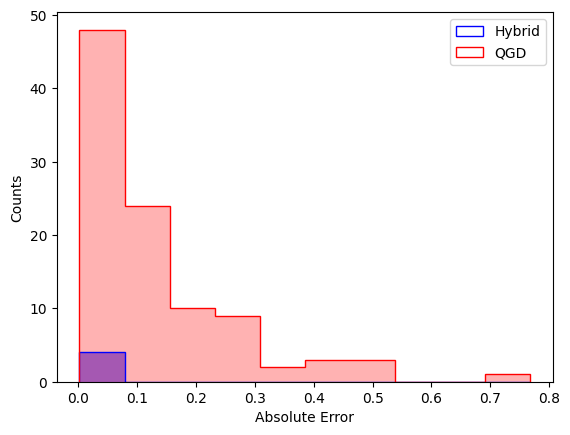

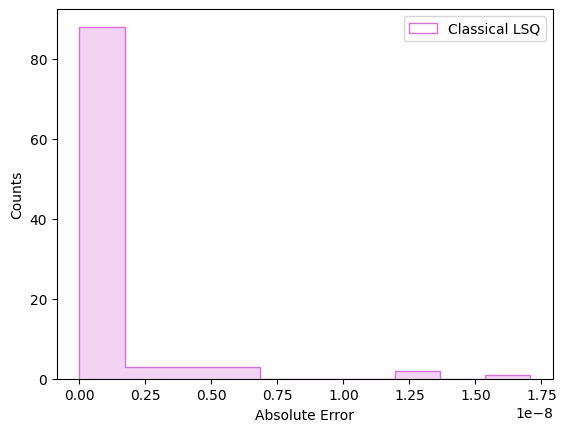

In [88]:
counts, bins = np.histogram(his_q) #histogram with qgd and hybrid
bins[0] = 0
print(f"the bins : {bins}")
plt.figure()

plt.xlabel('Absolute Error')
plt.ylabel('Counts')

plt.hist(his_clas, bins = bins, color = 'blue', alpha = 0.5, histtype = 'stepfilled')
plt.hist(his_clas, bins = bins, edgecolor = 'blue', alpha = 1.0, histtype = 'step', label='Hybrid')

plt.hist(his_q, bins = bins, color = 'red', alpha = 0.3, histtype = 'stepfilled')
plt.hist(his_q, bins = bins, edgecolor = 'red', alpha = 1.0, histtype = 'step', label = 'QGD')

plt.legend()

plt.figure() #histogram for full classical

counts, bins = np.histogram(his_fullclas)

plt.xlabel('Absolute Error')
plt.ylabel('Counts')

plt.hist(his_fullclas, bins = bins, color = 'orchid', alpha = 0.3, histtype = 'stepfilled')
plt.hist(his_fullclas, bins = bins, edgecolor = 'orchid', alpha = 1.0, histtype = 'step', label = 'Classical LSQ')

plt.legend()

plt.show()